In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [15]:
reward_range = 11

In [16]:
rnn_rollout_dirs = [f'tiny_rnn_rollouts_A/rnn_rollouts_reward_{r+1}' for r in range(reward_range)]

In [17]:
rnn_rollout_dirs

['tiny_rnn_rollouts_A/rnn_rollouts_reward_1',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_2',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_3',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_4',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_5',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_6',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_7',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_8',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_9',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_10',
 'tiny_rnn_rollouts_A/rnn_rollouts_reward_11']

In [18]:
all_rollout_jsons = []
for roll_dir in rnn_rollout_dirs:
    all_jsons = []
    for jspath in Path(roll_dir).glob('*.json'):
        with open(jspath) as f:
            all_jsons.append(json.load(f))
    all_rollout_jsons.append(all_jsons)

In [19]:
final_rewards = [[roll['rewards'][-1] for roll in rolls] for rolls in all_rollout_jsons]

In [20]:
#final_rewards[0]

Text(0, 0.5, 'Frequency')

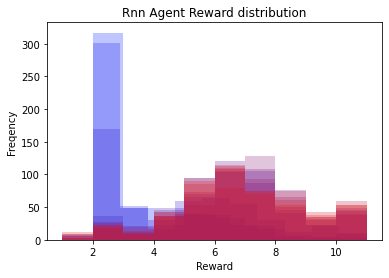

In [21]:
for i in range(reward_range):
    plt.hist(final_rewards[i], color=(i/reward_range,0.1,1-i/reward_range), alpha=0.25)
plt.title(f'Rnn Agent Reward distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

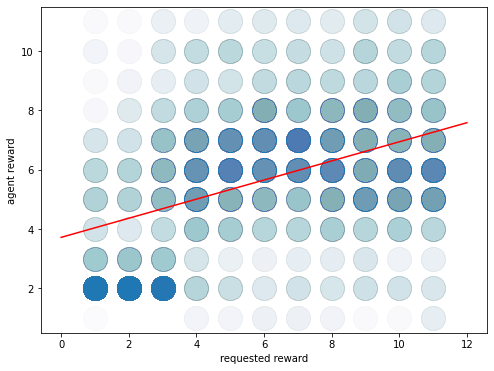

In [22]:

x = np.arange(1,reward_range+1).repeat(len(final_rewards[0])).reshape(-1, 1)

y = np.array(final_rewards).reshape(-1, 1)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 12, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(x, y, alpha=0.008, s=590)
ax.plot(x_new, y_new, color=(1,0,0))

ax.set_xlabel('requested reward')
ax.set_ylabel('agent reward')

#ax.axis('tight')


plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
conf = confusion_matrix(x, y)
conf

array([[  2, 317,  48,  23,  39,  34,  21,   4,   3,   6,   3],
       [  0, 302,  51,  17,  39,  38,  23,  16,   7,   4,   3],
       [  0, 169,  48,  30,  60,  64,  55,  31,  12,  21,  10],
       [  6,  37,  21,  49,  94, 104,  87,  41,  23,  30,   8],
       [  6,  27,  10,  45,  70, 121, 106,  45,  22,  34,  14],
       [  9,  17,   9,  36,  65, 105, 108,  76,  31,  28,  16],
       [  9,  23,  12,  36,  53, 108, 128,  50,  35,  29,  17],
       [  7,  20,  13,  43,  73, 113,  93,  66,  32,  25,  15],
       [  3,  25,  19,  36,  95,  79,  74,  75,  35,  37,  22],
       [  3,  23,   8,  42,  86, 110,  70,  61,  43,  31,  23],
       [ 12,  19,  10,  35,  90, 115,  74,  54,  38,  36,  17]])

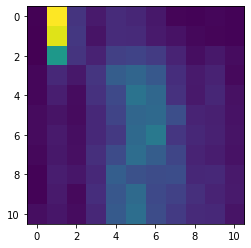

In [25]:
plt.imshow(conf)